## Motivação Hipotética: DataSciencester

### Encontrando Conectores-Chave

In [81]:
users = [
    { "id": 0, "name": "Hero"},
    { "id": 1, "name": "Dunn"},
    { "id": 2, "name": "Sue"},
    { "id": 3, "name": "Chi"},
    { "id": 4, "name": "Thor"},
    { "id": 5, "name": "Clive"},
    { "id": 6, "name": "Hicks"},
    { "id": 7, "name": "Devin"},
    { "id": 8, "name": "Kate"},
    { "id": 9, "name": "Klein"},
]

In [82]:
friendships= [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), 
              (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [83]:
for user in users:
    user["friends"] = []

In [84]:
for i, j in friendships:
    users[i]["friends"].append(users[j])
    users[j]["friends"].append(users[i])
    
users

[{'id': 0,
  'name': 'Hero',
  'friends': [{'id': 1,
    'name': 'Dunn',
    'friends': [{...},
     {'id': 2,
      'name': 'Sue',
      'friends': [{...},
       {...},
       {'id': 3,
        'name': 'Chi',
        'friends': [{...},
         {...},
         {'id': 4,
          'name': 'Thor',
          'friends': [{...},
           {'id': 5,
            'name': 'Clive',
            'friends': [{...},
             {'id': 6,
              'name': 'Hicks',
              'friends': [{...},
               {'id': 8,
                'name': 'Kate',
                'friends': [{...},
                 {'id': 7, 'name': 'Devin', 'friends': [{...}, {...}]},
                 {'id': 9, 'name': 'Klein', 'friends': [{...}]}]}]},
             {'id': 7,
              'name': 'Devin',
              'friends': [{...},
               {'id': 8,
                'name': 'Kate',
                'friends': [{'id': 6,
                  'name': 'Hicks',
                  'friends': [{...}, {...}]},
        

In [85]:
def number_of_friends(user):
    return len(user["friends"])

total_connections = sum(number_of_friends(user) 
                        for user in users)
total_connections

24

In [86]:
from __future__ import division
num_users = len(users)
avg_connections = total_connections / num_users
avg_connections

2.4

In [87]:
num_friends_by_id = [(user["id"], number_of_friends(user))
                     for user in users]
    
num_friends_by_id

[(0, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 2),
 (5, 3),
 (6, 2),
 (7, 2),
 (8, 3),
 (9, 1)]

### Cientista de Dados que Você Talvez Conheça

In [88]:
def friends_of_friend_ids_bad(user):
    return [foaf["id"]
            for friend in user["friends"]
            for foaf in friend["friends"]]

friends_of_friend_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [89]:
print([friend["id"] for friend in users[0]["friends"]])
print([friend["id"] for friend in users[1]["friends"]])
print([friend["id"] for friend in users[0]["friends"]])

[1, 2]
[0, 2, 3]
[1, 2]


In [90]:
from collections import Counter

def not_the_same(user, other_user):
    return user["id"] != other_user["id"]

def not_friends(user, other_user):
    return all(not_the_same(friend, other_user)
               for friend in user["friends"])

def friends_of_friend_ids(user):
    return Counter(foaf["id"]
                   for friend in user["friends"]
                   for foaf in friend["friends"]
                   if not_the_same(user, foaf)
                   and not_friends(user, foaf))

print(friends_of_friend_ids(users[3]))
#print(friends_of_friend_ids(users[4]))

Counter({0: 2, 5: 1})


In [91]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [92]:
def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]


In [93]:
from collections import defaultdict

user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)
    

In [95]:
from collections import Counter
def most_common_interests_with(user):
    return Counter(interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"])

print(most_common_interests_with(users[0]))

Counter({9: 3, 1: 2, 8: 1, 5: 1})


### Salários e Experiência

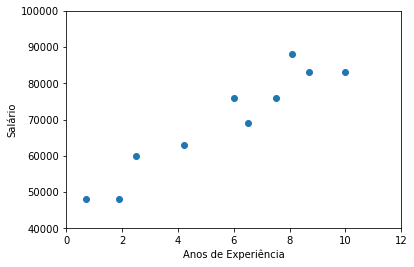

In [100]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

salaries = [salaries for salaries, tenures in salaries_and_tenures]
tenures = [tenures for salaries, tenures in salaries_and_tenures]

import matplotlib.pyplot as plt
plt.scatter(tenures, salaries)
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário")
plt.xlim(0, 12)
plt.ylim(40000, 100000)
plt.show()

In [106]:
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}
sorted(average_salary_by_tenure.items())


[(0.7, 48000.0),
 (1.9, 48000.0),
 (2.5, 60000.0),
 (4.2, 63000.0),
 (6, 76000.0),
 (6.5, 69000.0),
 (7.5, 76000.0),
 (8.1, 88000.0),
 (8.7, 83000.0),
 (10, 83000.0)]

In [107]:
def tenure_bucket(tenure):
    if tenure < 2: return "less than two"
    elif tenure < 5: return "between two and five"
    else: return "more than five"

salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

salary_by_tenure_bucket

defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between two and five': [60000, 63000]})

In [108]:
average_salary_by_bucket = {
    tenure_bucket : sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

### Contas Pagas

In [110]:
def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0: 
    return "paid"
  elif years_experience < 8.5: 
        return "unpaid"
  else: 
    return "paid"

### Tópicos de Interesse

In [115]:
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())
for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
